# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Institut

## Data Understanding

**Jaya Jaya Institut** merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

Nah, sebagai calon data scientist masa depan Anda diminta untuk membantu Jaya Jaya Institut dalam menyelesaikan permasalahannya. Mereka telah menyediakan dataset yang dapat Anda unduh melalui tautan berikut: [students' performance](https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/README.md). Selain itu, mereka juga meminta Anda untuk membuatkan dashboard agar mereka mudah dalam memahami data dan memonitor performa siswa.

## Data Collection

### Import Library

In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Data Load

In [2]:
df = pd.read_csv('datasets/data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666.666.666.666.600,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate


## Exploratory Data Analysis

### Statistik Deskriptif

Menampilkan jumlah kolom dan menyesuaikan tipe data berdasarkan fitur-fitur yang sebenarnya

In [3]:
# Menampilkan jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Menampilkan tipe data setiap fitur
print("\nTipe data setiap fitur:")
print(df.dtypes)

Jumlah baris: 4424
Jumlah kolom: 37

Tipe data setiap fitur:
Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                    

In [4]:
# Menampilkan kolom bertipe data string (object) pada dataset
string_columns = df.select_dtypes(include=['object']).columns
print("Kolom bertipe data string (object):")
print(string_columns)

Kolom bertipe data string (object):
Index(['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
       'Status'],
      dtype='object')


Terdapat 4424 baris data dan 37 kolom/fitur yang tersedia dalam dataset ini. Untuk tipe datanya saya rasa sudah sesuai dengan fitur-fitur yang ada.

In [5]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,4.706600,0.137658,0.541817,6.232143,8.063291,4.435805,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,3.094238,0.690880,1.918546,2.195951,3.947951,3.014764,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,3.000000,0.000000,0.000000,5.000000,6.000000,2.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,5.000000,0.000000,0.000000,6.000000,8.000000,5.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,6.000000,0.000000,0.000000,7.000000,10.000000,6.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,26.000000,12.000000,19.000000,23.000000,33.000000,20.000000,12.000000,16.200000,3.700000,3.510000


Menampilkan Ringkasan Statistik seperti rata-rata (mean), standar deviasi, persentil (25%, 50%, 75%), nilai minimum, dan nilai maksimum

Mengecek apakah terdapat missing value atau tidak

### Cek Missing Value

In [6]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Tidak ada yang missing value. next step

### Cek Data Duplicate

In [7]:
df.duplicated().sum()

0

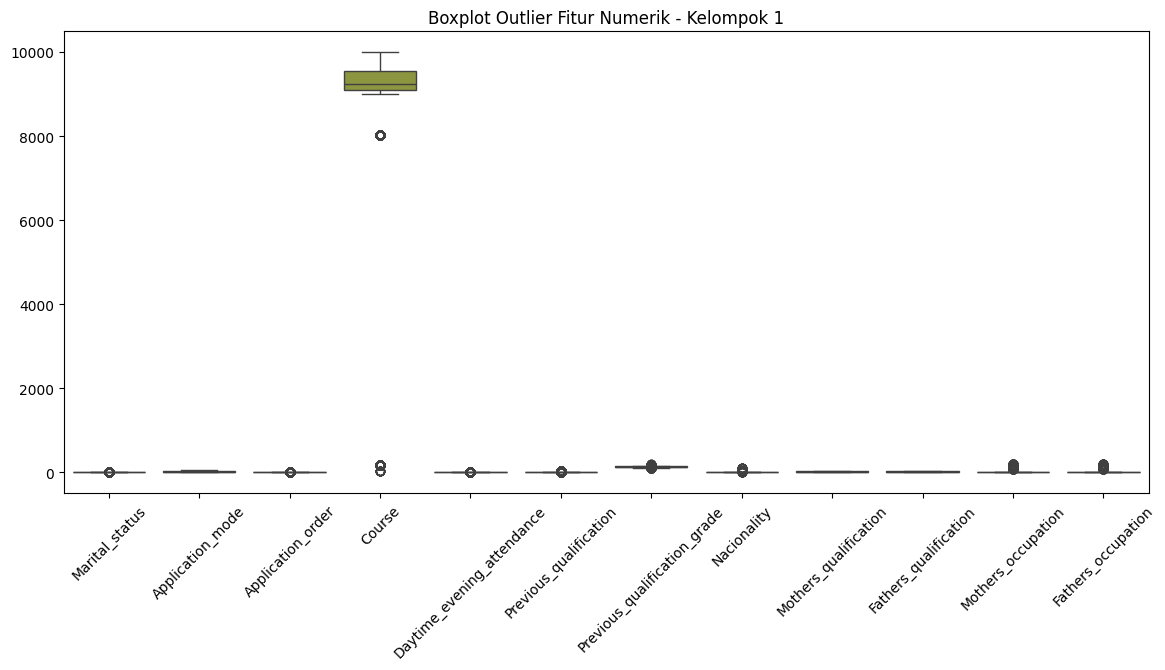

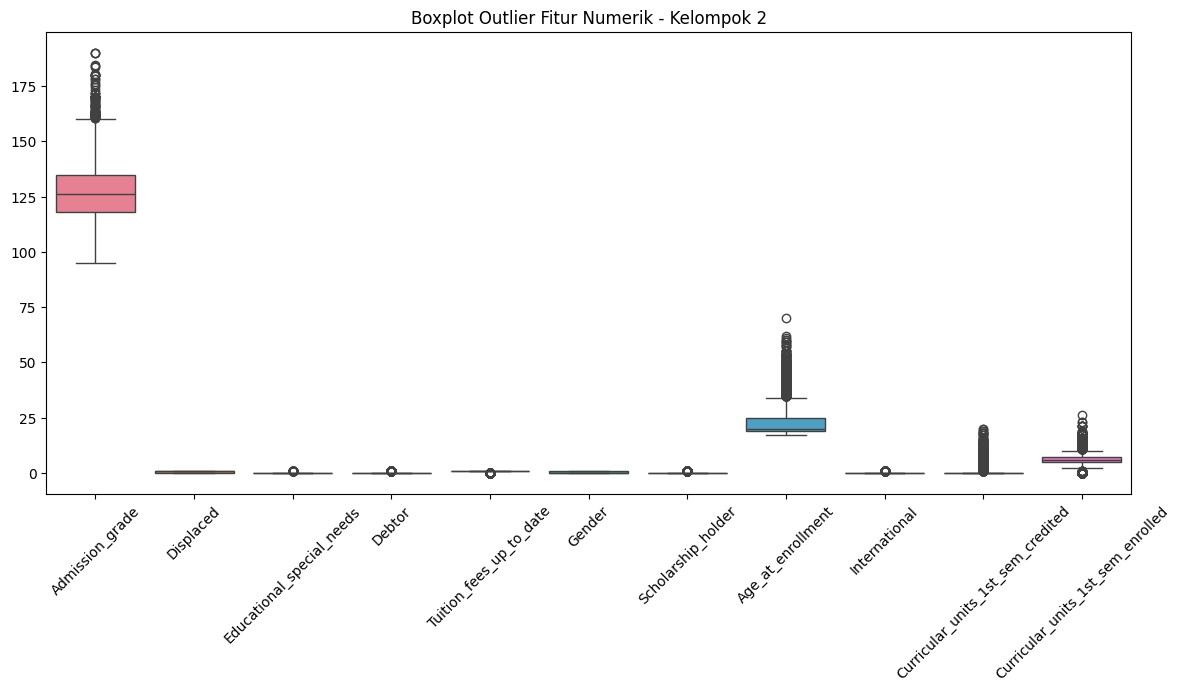

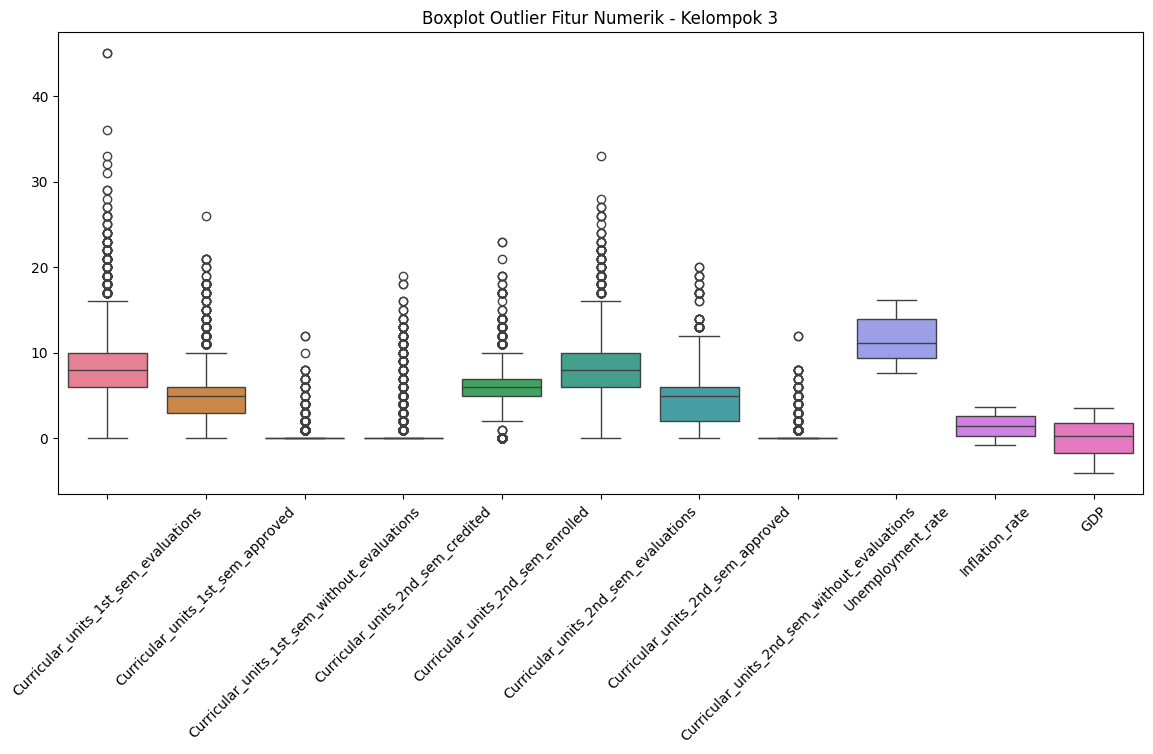

In [8]:
# Ambil semua fitur numerik
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Bagi fitur numerik menjadi 2 atau 3 kelompok agar boxplot tidak terlalu padat

n_groups = 3  # jumlah kelompok
feature_groups = np.array_split(numeric_features, n_groups)

for i, group in enumerate(feature_groups, 1):
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df[group])
    plt.title(f'Boxplot Outlier Fitur Numerik - Kelompok {i}')
    plt.xticks(rotation=45)
    plt.show()

### Menampilkan Correlation Matrix

Top 5 Korelasi Tertinggi antar Fitur:
Curricular_units_2nd_sem_credited  Curricular_units_1st_sem_credited    0.944811
Curricular_units_2nd_sem_enrolled  Curricular_units_1st_sem_enrolled    0.942627
Mothers_occupation                 Fathers_occupation                   0.910472
Curricular_units_2nd_sem_approved  Curricular_units_1st_sem_approved    0.904002
International                      Nacionality                          0.790935
dtype: float64

Matrix Korelasi Top 5 Fitur:
                                   Curricular_units_2nd_sem_credited  \
Curricular_units_2nd_sem_credited                           1.000000   
Curricular_units_1st_sem_credited                           0.944811   
Curricular_units_1st_sem_approved                           0.607661   
Curricular_units_1st_sem_enrolled                           0.753747   
International                                               0.002573   
Nacionality                                                -0.007278   
Fathers_

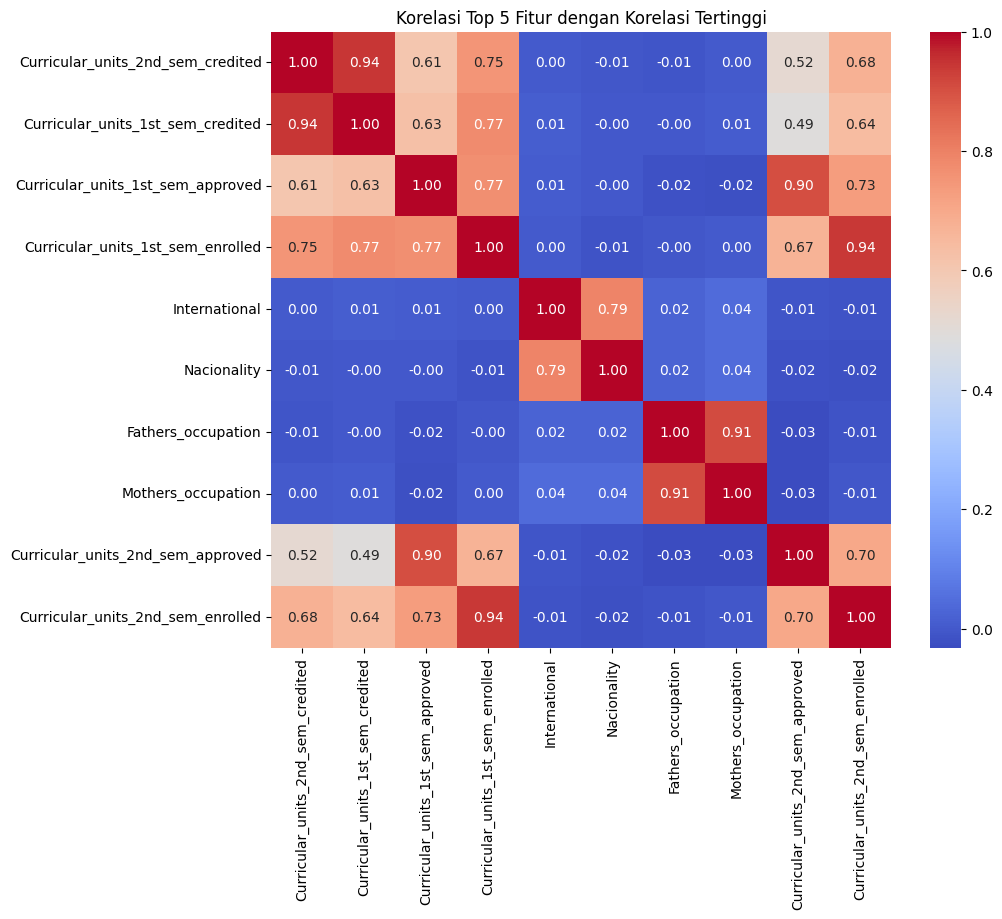

In [9]:
# Hitung matriks korelasi untuk fitur numerik
corr_matrix = df[numeric_features].corr()

# Unstack dan ambil korelasi absolut, lalu buang diagonal/self-correlation
corr_unstacked = corr_matrix.abs().unstack()
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]

# Ambil 5 pasang fitur dengan korelasi absolut tertinggi (selain diagonal/self-correlation)
top5_corr = corr_unstacked.sort_values(ascending=False).drop_duplicates().head(5)
print("Top 5 Korelasi Tertinggi antar Fitur:")
print(top5_corr)

# Buat matrix korelasi hanya untuk fitur-fitur yang terlibat di top 5 korelasi
top_features = set()
for idx in top5_corr.index:
    top_features.update(idx)
top_features = list(top_features)

# Tampilkan matrix korelasi untuk fitur-fitur tersebut
corr_top_matrix = corr_matrix.loc[top_features, top_features]
print("\nMatrix Korelasi Top 5 Fitur:")
print(corr_top_matrix)

# Visualisasi matrix korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_top_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Top 5 Fitur dengan Korelasi Tertinggi')
plt.show()

Korelasi tertinggi dalam data mahasiswa Jaya Jaya Institut adalah antara fitur `Curricular_units_2nd_sem_credited` dan `Curricular_units_1st_sem_credited` dengan nilai korelasi sebesar **0.9448**. Ini menunjukkan bahwa mahasiswa yang berhasil mengumpulkan SKS di semester pertama cenderung juga berhasil pada semester kedua, mencerminkan konsistensi performa akademik antar semester.

Pada output tersebut tidak ada data yang duplicate, lanjut ke step berikutnya.

## Data Preprocessing

In [10]:
# Ganti koma dengan titik di dua kolom IPK
df['Curricular_units_1st_sem_grade'] = df['Curricular_units_1st_sem_grade'].str.replace(',', '.')
df['Curricular_units_2nd_sem_grade'] = df['Curricular_units_2nd_sem_grade'].str.replace(',', '.')


In [11]:
for col in ['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']:
    df[col] = df[col].str.replace('.', '', regex=False)  # Hapus titik ribuan
    df[col] = df[col].str.replace(',', '.', regex=False)  # Ganti koma jadi titik desimal
    df[col] = df[col].astype(float)  # Ubah jadi float


In [12]:
print(df.dtypes)

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

### Label Encoding 

In [ ]:
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])

### Memisahkan fitur dan target

In [14]:
X = df.drop(columns=['Status'])
y = df['Status']

### Bagi Dataset menjadi Data Train dan Data Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Melatih Model Random Forest

In [ ]:
rf_model = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

### Melatih Model Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=500, C= 0.1, solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=500)

## Evaluation

### Evaluasi Performa Model

In [31]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_model.predict(X_test)))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_model.predict(X_test)))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       316
           1       0.52      0.30      0.38       151
           2       0.77      0.94      0.84       418

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.35      0.49       316
           1       0.00      0.00      0.00       151
           2       0.54      0.97      0.69       418

    accuracy                           0.58       885
   macro avg       0.46      0.44      0.39       885
weighted avg       0.55      0.58      0.50       885



c:\Users\TUF GAMING\.conda\envs\verzha_new\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TUF GAMING\.conda\envs\verzha_new\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TUF GAMING\.conda\envs\verzha_new\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

### Confusion Matrix Report

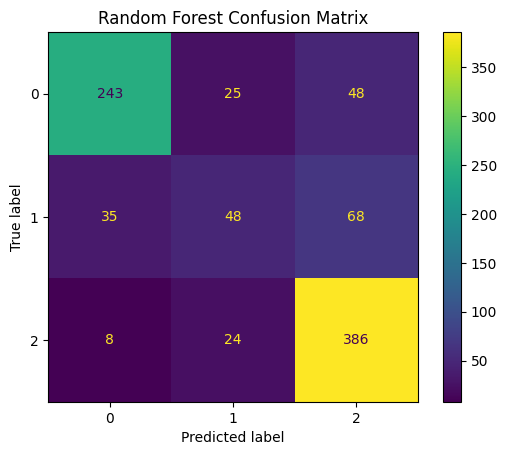

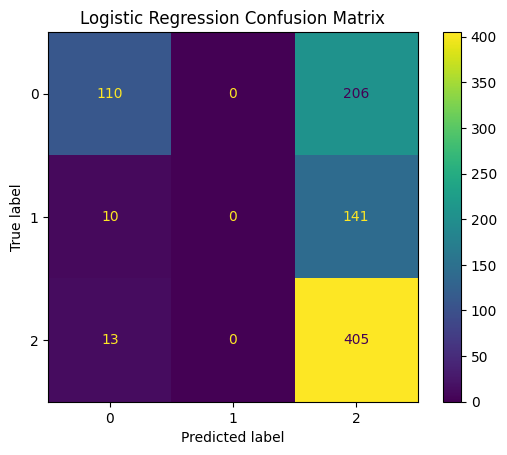

In [19]:
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_model.predict(X_test))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_model.predict(X_test))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
disp_lr.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Save Model

In [20]:
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']